<a href="https://colab.research.google.com/github/irfannhkm/2241720230_Machine-Learning_2024/blob/main/Week%204/week04_t2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

## Import Library

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pathlib import Path
import matplotlib.image as mpimg

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/Machine Learning/images/training/"
test_dir = "/content/drive/MyDrive/Machine Learning/images/test/"

# Load Data

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [ ]:
# Fungsi untuk mengekstrak histogram dari gambar
def extract_histogram_image(img):
    # Jika gambar berwarna (RGB), kita konversi ke grayscale
    if len(img.shape) == 3 and img.shape[2] == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Menghitung histogram menggunakan OpenCV
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    # Normalisasi histogram
    hist = cv2.normalize(hist, hist).flatten()

    return hist


In [ ]:
train_data = load_dataset(train_dir)
test_data = load_dataset(test_dir)

In [ ]:
# Ekstrak fitur histogram dan label dari data pelatihan
X_train = []
y_train = []

for img, label in train_data:
    hist = extract_histogram_image(img)
    X_train.append(hist)
    y_train.append(label)

In [ ]:
# Ekstrak fitur histogram dan label dari data pengujian
X_test = []
y_test = []

for img, label in test_data:
    hist = extract_histogram_image(img)
    X_test.append(hist)
    y_test.append(label)

In [ ]:
# Konversi ke numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Membuat model SVM
svm_model = SVC(kernel='linear')

In [ ]:
# Melatih model SVM dengan data pelatihan
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# Memprediksi data pengujian
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluasi hasil
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[76  4]
 [ 3 77]]

Classification Report:
              precision    recall  f1-score   support

         day       0.96      0.95      0.96        80
       night       0.95      0.96      0.96        80

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160



Confusion Matrix:

* True Positives (TP):
"Day" diklasifikasikan dengan benar sebagai "Day" sebanyak 76 kali.
"Night" diklasifikasikan dengan benar sebagai "Night" sebanyak 77 kali.
* False Positives (FP):
4 sampel "Night" diklasifikasikan sebagai "Day".
* False Negatives (FN):
3 sampel "Day" diklasifikasikan sebagai "Night".

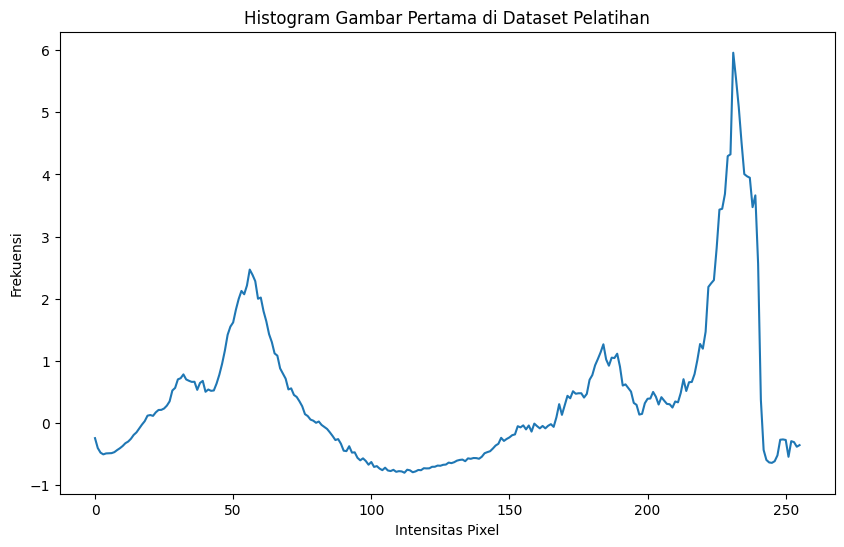

In [ ]:
# Menampilkan histogram dari salah satu gambar
plt.figure(figsize=(10, 6))
plt.plot(X_train[0])  # Menampilkan histogram dari gambar pertama di data pelatihan
plt.title('Histogram Gambar Pertama di Dataset Pelatihan')
plt.xlabel('Intensitas Pixel')
plt.ylabel('Frekuensi')
plt.show()

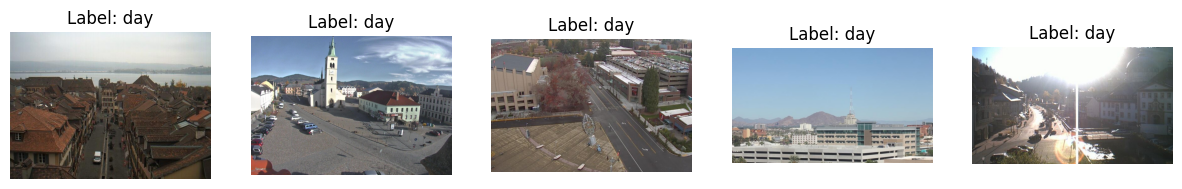

In [ ]:
# Fungsi untuk menampilkan beberapa gambar dari dataset dengan labelnya
def display_images(img_list, num_images=5):
    plt.figure(figsize=(15, 5))

    for i, (img, label) in enumerate(img_list[:num_images]):  # Ambil beberapa gambar pertama
        plt.subplot(1, num_images, i+1)
        plt.imshow(img, cmap='gray')  # Menampilkan gambar, gunakan 'gray' jika gambar grayscale
        plt.title(f"Label: {label}")
        plt.axis('off')  # Hilangkan grid/ticks

    plt.show()

# Tampilkan 5 gambar pertama dari dataset pelatihan
display_images(train_data, num_images=5)

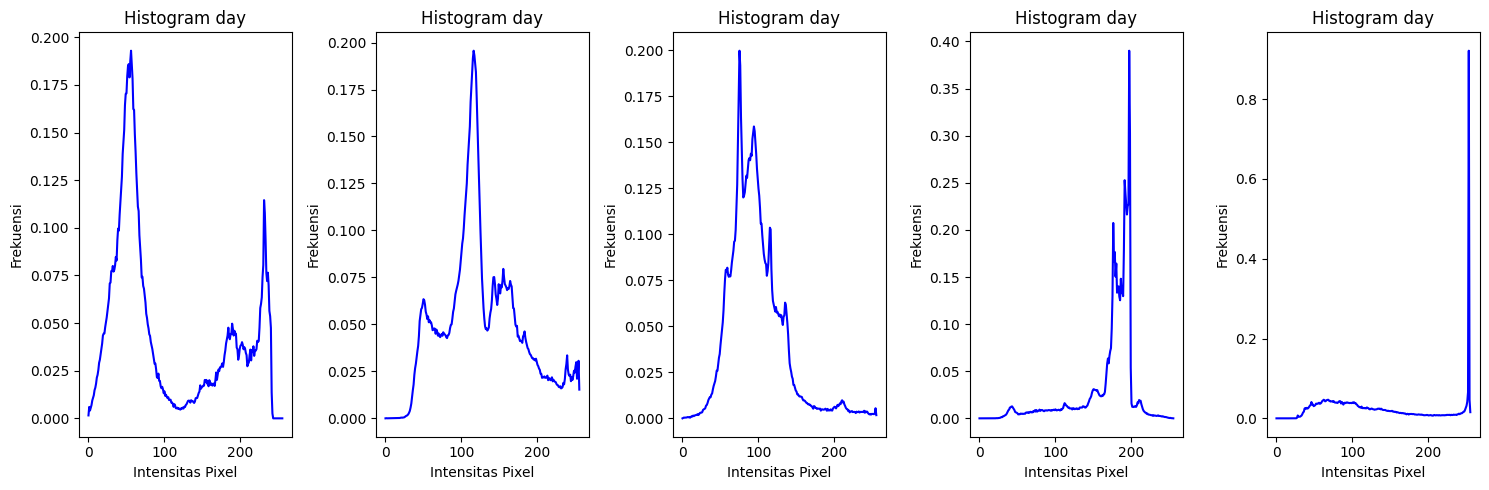

In [ ]:
# Fungsi untuk menampilkan histogram dari beberapa gambar pertama di dataset
def display_histograms(img_list, num_images=5):
    plt.figure(figsize=(15, 5))

    for i, (img, label) in enumerate(img_list[:num_images]):  # Ambil beberapa gambar pertama
        hist = extract_histogram_image(img)  # Ekstraksi histogram

        # Buat subplot untuk histogram setiap gambar
        plt.subplot(1, num_images, i+1)
        plt.plot(hist, color='blue')  # Plot histogram
        plt.title(f"Histogram {label}")
        plt.xlabel('Intensitas Pixel')
        plt.ylabel('Frekuensi')
        plt.tight_layout()

    plt.show()

# Tampilkan histogram dari 5 gambar pertama
display_histograms(train_data, num_images=5)

## Kesimpulan:
Secara keseluruhan, model SVM ini berhasil menunjukkan performa yang baik dalam mengklasifikasikan gambar antara "Day" dan "Night".
* Model ini sangat efektif untuk mengklasifikasikan antara "Day" dan "Night", dengan f1-score yang seimbang untuk kedua kelas (0.96 untuk masing-masing).
* Hanya sedikit kesalahan klasifikasi yang terjadi (4 False Positives dan 3 False Negatives), menunjukkan bahwa model memiliki performa yang konsisten untuk kedua kelas.
* Akurasi keseluruhan sebesar 96% menandakan bahwa model ini sangat dapat diandalkan dalam melakukan prediksi.